In [5]:
import numpy as np
from numpy import array, argsort, arange

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

import sys
sys.path.insert(1, '../../../utils')
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, \
    plot_multiline_chart, plot_evaluation_results, plot_horizontal_bar_chart, \
    HEIGHT, plot_line_chart
from studies import naive_Bayes_study, logistic_regression_study, knn_study, trees_study, mlp_study, \
        run_all_nb, run_all_knn, run_all_lr, run_all_dt, run_all_mlp, run_all_rf, run_all_gb, \
        show_tree_and_importances_dt, show_importances_rf, show_importances_gb

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show, subplots

import pandas as pd


In [6]:
train_filename = "../data/prepared/balancing/flight_train_bal.csv"
test_filename  = "../data/prepared/balancing/flight_test_bal.csv"

train_df: pd.DataFrame = pd.read_csv(train_filename, na_values="")
test_df: pd.DataFrame  = pd.read_csv(test_filename,  na_values="")

print("Train shape:", train_df.shape)
print("Test  shape:", test_df.shape)

Train shape: (270834, 181)
Test  shape: (60000, 182)


In [7]:
target_name = "Cancelled"
file_tag    = "flight"
lab_folder  = "lab4_modelling"
approach    = "best"   
eval_metrics = ["recall"] #can add accuracy, f1, etc.

In [8]:
cols_to_drop = ["FlightDate"]

train_df = train_df.drop(columns=cols_to_drop, errors="ignore")
test_df  = test_df.drop(columns=cols_to_drop,  errors="ignore")

# Separate target and features
y_train = train_df[target_name].copy()
X_train = train_df.drop(columns=[target_name]).copy()

y_test = test_df[target_name].copy()
X_test = test_df.drop(columns=[target_name]).copy()

print("Features train shape:", X_train.shape)
print("Features test  shape:", X_test.shape)
print("Target train shape:", y_train.shape)
print("Target test  shape:", y_test.shape)

# Optional: ensure target is int (0/1) for dslabs helpers
y_train = y_train.astype(int)
y_test  = y_test.astype(int)

Features train shape: (270834, 180)
Features test  shape: (60000, 180)
Target train shape: (270834,)
Target test  shape: (60000,)


**NAIVE BAYES ANALYSIS - FLIGHT DATA**

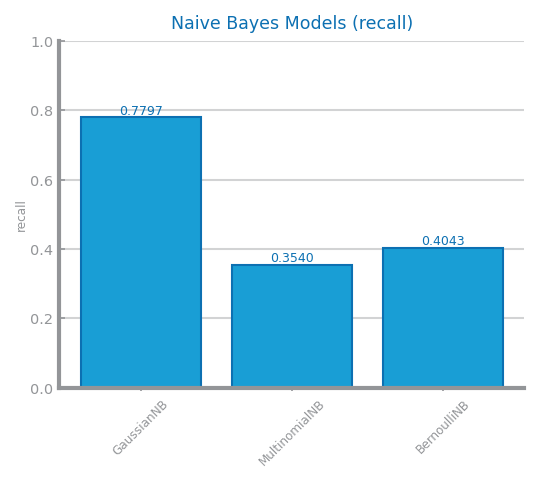

<Figure size 600x450 with 0 Axes>

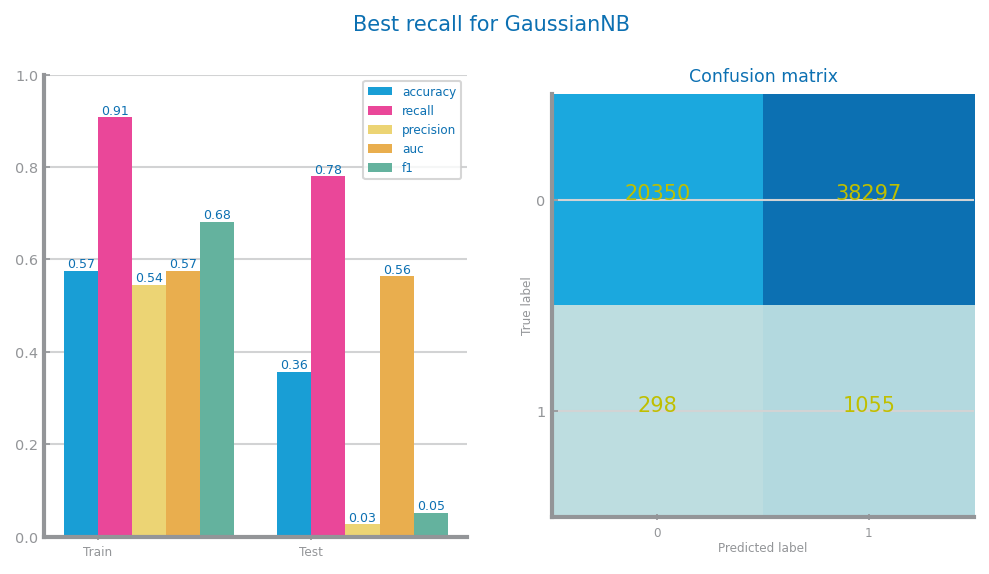


=== Naive Bayes with metric=recall ===
Best NB model: GaussianNB()
Best NB params: {'name': 'GaussianNB', 'metric': 'recall', 'params': (), 'recall': 0.7797487065779749}


In [9]:
for metric in eval_metrics:
    nb_best_model, nb_params = run_all_nb(
        X_train, y_train,
        X_test,  y_test,
        lab_folder, file_tag, approach,
        eval_metric=metric,
    )
    print(f"\n=== Naive Bayes with metric={metric} ===")
    print("Best NB model:", nb_best_model)
    print("Best NB params:", nb_params)

In [23]:
# Best NB model: GaussianNB()
# Best NB params: {'name': 'GaussianNB', 'metric': 'recall', 'params': (), 'recall': 0.7797487065779749}

**LOGISTIC REGRESSION ANALYSIS - FLIGHT DATA**

In [ ]:
metrics = ["recall"]   

for el in metrics:
    lr_best_model, lr_params = run_all_lr(
        X_train, y_train,
        X_test,  y_test,
        lab_folder, file_tag, approach,
        nr_max_iterations=5000,
        lag=500,
        eval_metric=el,
    )

    print(f"\n=== Logistic Regression with metric={el} ===")
    print("Best LR model:", lr_best_model)
    print("Best LR params:", lr_params)

**DECISION TREES ANALYSIS - FLIGHT DATA**

In [ ]:
metrics = ["recall"]  

for el in metrics:
    dt_best_model, dt_params = run_all_dt(
        X_train, y_train,
        X_test,  y_test,
        lab_folder, file_tag, approach,
        d_max=25,
        lag=1,
        eval_metric=el,
    )
    
    show_tree_and_importances_dt(
        X_train, y_train,
        dt_best_model, dt_params,
        lab_folder, file_tag, approach,
        max_depth2show=3,
    )

    print(f"\n=== Decision Trees with metric={el} ===")
    print("Best DT model:", dt_best_model)
    print("Best DT params:", dt_params)

**MLP ANALYSIS - FLIGHT DATA**

In [ ]:
metrics = ["recall"]   

for el in metrics:
    mlp_best_model, mlp_params = run_all_mlp(
        X_train, y_train,
        X_test,  y_test,
        lab_folder, file_tag, approach,
        nr_max_iterations=5000,
        lag=500,
        eval_metric=el,
    )

    print(f"\n=== MLP with metric={el} ===")
    print("Best MLP model:", mlp_best_model)
    print("Best MLP params:", mlp_params)

**KNN ANALYSIS - FLIGHT DATA**

In [ ]:
metrics = ["recall"]  

for el in metrics:
    knn_best_model, knn_params = run_all_knn(
        X_train, y_train,
        X_test,  y_test,
        lab_folder, file_tag, approach,
        k_max=35,
        lag=2,
        eval_metric=el,
    )

    print(f"\n=== KNN with metric={el} ===")
    print("Best KNN model:", knn_best_model)
    print("Best KNN params:", knn_params)

**RANDOM FORESTS - FLIGHT DATA**

In [ ]:
metrics = ["recall"] 

for el in metrics:
    rf_best_model, rf_params = run_all_rf(
        X_train, y_train,
        X_test,  y_test,
        lab_folder, file_tag, approach,
        nr_max_trees=1000,
        lag=250,
        eval_metric=el,
    )

    show_importances_rf(
        X_train,            # features frame
        rf_best_model,
        rf_params,
        lab_folder,
        file_tag,
        approach,
    )

    print(f"\n=== Random Forests with metric={el} ===")
    print("Best RF model:", rf_best_model)
    print("Best RF params:", rf_params)

**GRADIENT BOOSTING OR XGBOOST - FLIGHT DATA**

In [ ]:
metrics = ["recall"]   

for el in metrics:
    gb_best_model, gb_params = run_all_gb(
        X_train, y_train,
        X_test,  y_test,
        lab_folder, file_tag, approach,
        nr_max_trees=1000,
        lag=250,
        eval_metric=el,
    )

    show_importances_gb(
        X_train,
        gb_best_model,
        gb_params,
        lab_folder,
        file_tag,
        approach,
    )

    print(f"\n=== Gradient Boosting/XGBoost with metric={el} ===")
    print("Best GB model:", gb_best_model)
    print("Best GB params:", gb_params)